In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Convolution2D

In [5]:
from tensorflow.keras.layers import MaxPooling2D

In [6]:
from tensorflow.keras.layers import Flatten

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
import warnings 
warnings.filterwarnings('ignore')

In [9]:
Classifier=Sequential()


In [10]:
Classifier.add(Convolution2D(32,3,3,input_shape=(250,250,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 83, 83, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')

In [13]:
test_datagen=ImageDataGenerator(rescale=1.255)

In [14]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 308 images belonging to 3 classes.


In [15]:
test_set = train_datagen.flow_from_directory('dataset/test',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 78 images belonging to 3 classes.


In [16]:
from IPython.display import display

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
img_dims=150
epochs= 5
batch_size=32

In [19]:
history = Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/5
9/9 [==============================] - 52s 6s/step - loss: 1.0969 - accuracy: 0.5254 - val_loss: 0.8819 - val_accuracy: 0.5625
Epoch 2/5
9/9 [==============================] - 49s 6s/step - loss: 0.8982 - accuracy: 0.6232 - val_loss: 0.6080 - val_accuracy: 0.6875
Epoch 3/5
9/9 [==============================] - 44s 5s/step - loss: 0.5224 - accuracy: 0.7899 - val_loss: 0.5433 - val_accuracy: 0.7656
Epoch 4/5
9/9 [==============================] - 46s 5s/step - loss: 0.5790 - accuracy: 0.7138 - val_loss: 0.4645 - val_accuracy: 0.8125
Epoch 5/5
9/9 [==============================] - 46s 5s/step - loss: 0.4423 - accuracy: 0.8080 - val_loss: 0.4371 - val_accuracy: 0.7500


In [20]:
import h5py

In [21]:
Classifier.save('leaf_.h5')

In [22]:
from keras.models import load_model

In [23]:
model=load_model('leaf_.h5')

In [24]:
import numpy as np

In [25]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('tt9.jpg',target_size=(250,250))

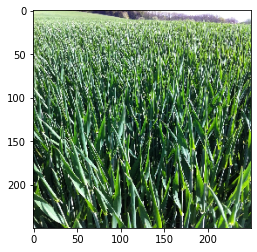

In [26]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)
print("")

In [27]:
test_image=image.img_to_array(test_image)

In [28]:
test_image=np.expand_dims(test_image,axis=0)

In [29]:
result=model.predict(test_image)

In [30]:
prediction = result[0]

In [31]:
classes=training_set.class_indices

In [32]:
classes

{'Healthy': 0, 'septoria': 1, 'stripe_rust': 2}

In [33]:
prediction=list(prediction)

In [34]:

prediction

[1.0, 0.0, 0.0]

In [35]:
classes=['Healthy','septoria','stripe_rust']

In [36]:
output=zip(classes,prediction)

In [37]:
output=dict(output)

In [38]:
output


{'Healthy': 1.0, 'septoria': 0.0, 'stripe_rust': 0.0}

In [39]:
if output['Healthy']==1.0 :
    print('Healthy')
elif output['septoria']==1.0:
    print('septoria')
elif output['stripe_rust']==1.0:
    print('stripe_rust')


Healthy


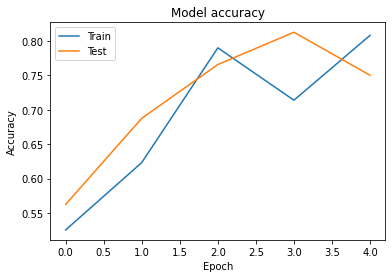

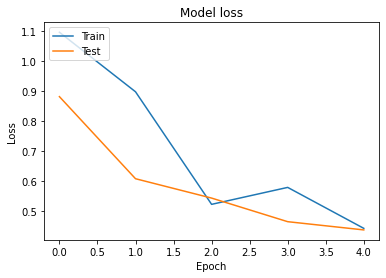

In [40]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()